<a href="https://colab.research.google.com/github/exx8/differential-diffusion/blob/main/examples/SD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building the environment

In [3]:
!rm -rf sample_data/
!git clone https://github.com/exx8/differential-diffusion.git code
!pip install diffusers==0.19.3 huggingface-hub==0.19.4 accelerate==0.24.1
%cd code

Cloning into 'code'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 63 (delta 12), reused 24 (delta 4), pack-reused 0
Receiving objects: 100% (63/63), 2.88 MiB | 3.84 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/code


#Load Prerequisites

In [4]:
import torch
from PIL import Image
from torchvision import transforms
from SD2.diff_pipe import StableDiffusionDiffImg2ImgPipeline

device = "cuda"

pipe = StableDiffusionDiffImg2ImgPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base",
                                                          torch_dtype=torch.float16).to(device)
#We can get even better pictures using more modern models. See the GitHub repo.

def preprocess_image(image):
    image = image.convert("RGB")
    image = transforms.CenterCrop((image.size[1] // 64 * 64, image.size[0] // 64 * 64))(image)
    image = transforms.ToTensor()(image)
    image = image * 2 - 1
    image = image.unsqueeze(0).to(device)
    return image


def preprocess_map(map):
    map = map.convert("L")
    map = transforms.CenterCrop((map.size[1] // 64 * 64, map.size[0] // 64 * 64))(map)
    # convert to tensor
    map = transforms.ToTensor()(map)
    map = map.to(device)
    return map

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [5]:
from IPython.display import Image as IPImage, display

##Input Image

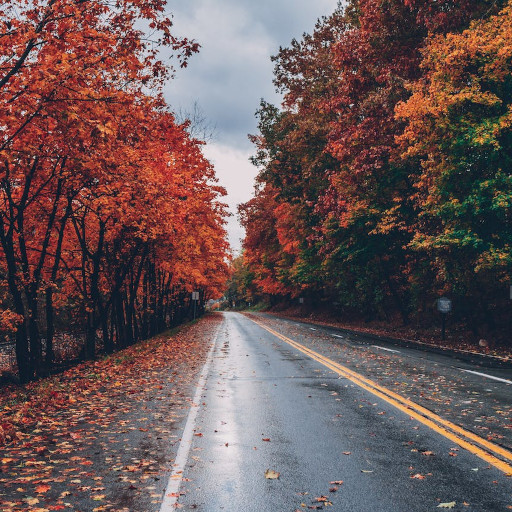

In [6]:
display(IPImage(filename='assets/input.jpg'))


##Input Change Map

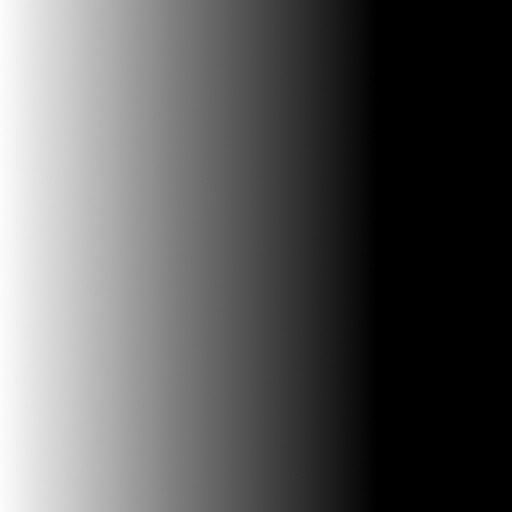

In [7]:
display(IPImage(filename='assets/map.jpg'))

In [8]:
image = Image.open("assets/input.jpg")
image = preprocess_image(image)

  0%|          | 0/100 [00:00<?, ?it/s]

Done!


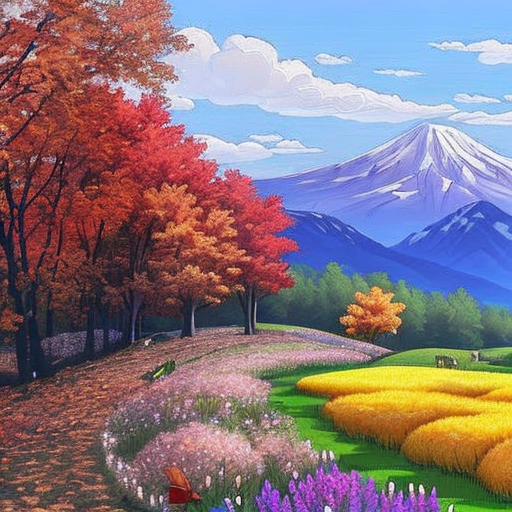

In [12]:
map = Image.open("assets/map.jpg")
map = preprocess_map(map)
edited_image = pipe(prompt=["painting of a mountain landscape with a meadow and a forest, meadow background, anime countryside landscape, anime nature wallpap, anime landscape wallpaper, studio ghibli landscape, anime landscape, mountain behind meadow, anime background art, studio ghibli environment, background of flowery hill, anime beautiful peace scene, forrest background, anime scenery, landscape background, background art, anime scenery concept art"], image=image, guidance_scale=7,
                    num_images_per_prompt=1, strength=1,
                    negative_prompt=["blurry, shadow polaroid photo, scary angry pose, worn decay texture, portrait fashion model, piercing stare, bruised face, demoness"], map=map, num_inference_steps=100).images[0]
edited_image.save("/content/output.png")
print("Done!")
display(edited_image)


We can change the map and get different edits...

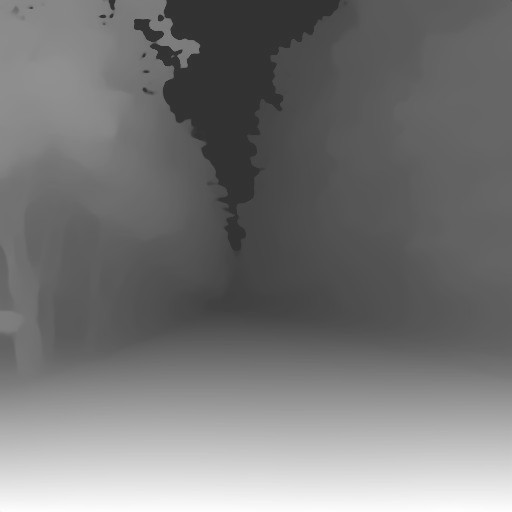

In [10]:
display(IPImage(filename='assets/map2.jpg'))

  0%|          | 0/100 [00:00<?, ?it/s]

Done!


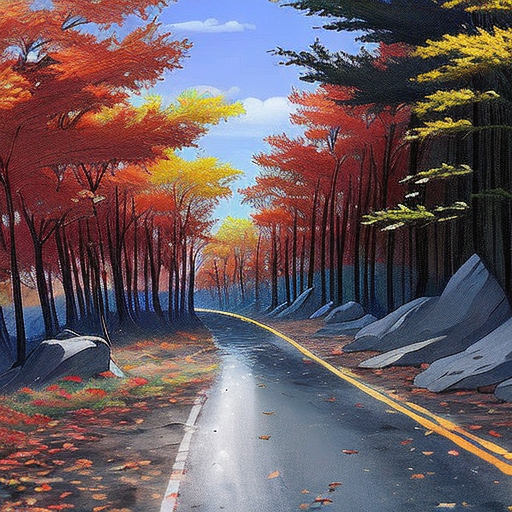

In [11]:
map = Image.open("assets/map2.jpg")
map = preprocess_map(map)
edited_image = pipe(prompt=["painting of a mountain landscape with a meadow and a forest, meadow background, anime countryside landscape, anime nature wallpap, anime landscape wallpaper, studio ghibli landscape, anime landscape, mountain behind meadow, anime background art, studio ghibli environment, background of flowery hill, anime beautiful peace scene, forrest background, anime scenery, landscape background, background art, anime scenery concept art"], image=image, guidance_scale=7,
                    num_images_per_prompt=1, strength=1,
                    negative_prompt=["blurry, shadow polaroid photo, scary angry pose, worn decay texture, portrait fashion model, piercing stare, bruised face, demoness"], map=map, num_inference_steps=100).images[0]
edited_image.save("/content/output.png")
print("Done!")
display(edited_image)

###Run again to get different pictures!